# Prototype simple Monte-Carlo simulation of a Gaussian


## Index:
* [Set-up](#setup)
* [Exact](#exact)
* [Metropolis](#metropolis)
* [numpy](#numpy)
* [Comparison](#comparison)
     

In [1]:

import numpy as np
import scipy as sp
import pandas as pd
import itertools


# Graphics
%matplotlib notebook
import matplotlib.pyplot as plt
# plt.style.use('ggplot')


import lsqfit
import gvar as gv

# Code for neat formatting.
from IPython.display import display, HTML, Markdown
def printmd(string):
    display(Markdown(string))




 
<a id = 'setup'></a>
### Parameters $ \mu$ , $\sigma$ and function

In [2]:
mu,sigma=0,1.1


In [3]:
def f_choose_func(ftno=1):
    if ftno==1:
        def f_gauss(x,mu,sigma):
            ''' Normal distribution'''
            return (1.0/(np.sqrt(2*np.pi)*sigma))*np.exp(-((x-mu)**2)/(2.0*sigma**2))
        return f_gauss

f_func=f_choose_func(1)
# print f_func(5,0,0.5)
# print f_gauss(5,0,0.5)

In [4]:
? f_func

<a id = 'exact'></a>

## Creating a sample using the exact formula:


<IPython.core.display.Javascript object>


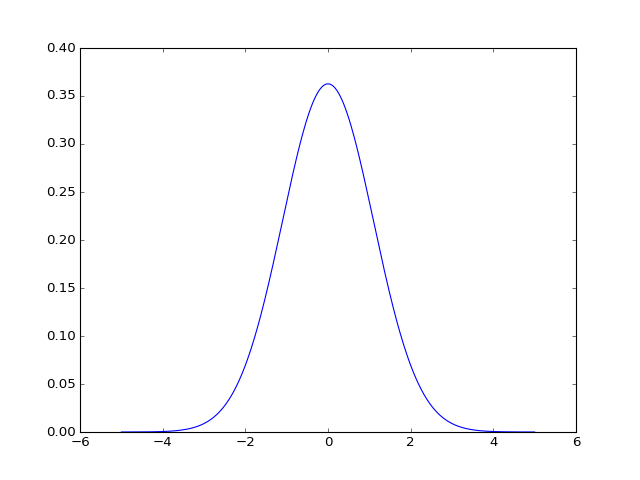

In [5]:
xarr=np.linspace(-5,5,1000)
yarr=f_func(xarr,mu,sigma) # Vectorization. nice!

plt.figure()
plt.plot(xarr,yarr)

<a id = 'metropolis'></a>

## Sampling using Metropolis Algorithm

In [6]:
num_mc=100000 # number of MC updates.

# Arrays to store MC points, acpt/reject, weight of the new conf calculate.
arr_metropolis=np.zeros(num_mc) 
acpt_arr=np.ones(num_mc,dtype=np.int)*-2
wght=np.zeros(num_mc)

# Choosing a seed for reproducibility.
np.random.seed(10207)

# head is the starting point in the real plane. We pick it to be a random number in the range -5,5
mx,mn=5,-5
head=mn+np.random.random()*(mx-mn)

# jump_size is the distance of the new point chosen (tail) from the old one (head)
jump_size=sigma/2.0

print head,jump_size

-0.540014750274 0.55


<IPython.core.display.Javascript object>


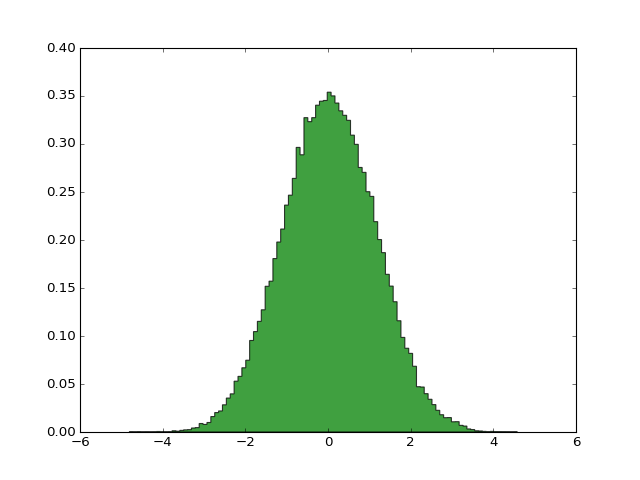

[None, None]

In [7]:

for i in range(num_mc):
    # Proposal
    tail=head+np.random.uniform(low=-1,high=1)*jump_size
    
    # Weight computation
    wt=f_func(tail,mu,sigma)/f_func(head,mu,sigma)
    wght[i]=wt
    
    # Metropolis accept-reject
    if np.random.random()<wt:
        head=tail
        acpt_arr[i]=1
    else :
        acpt_arr[i]=0
    arr_metropolis[i]=head

    
    
# Plotting histogram
bin_size=100

plt.figure()
n, bins, patches = plt.hist(arr_metropolis, bins=bin_size, normed=1, histtype='stepfilled')
plt.setp(patches, 'facecolor', 'g', 'alpha', 0.75)


<a id = 'numpy'></a>

## Creating sample using numpy's Gaussian sampler

<IPython.core.display.Javascript object>


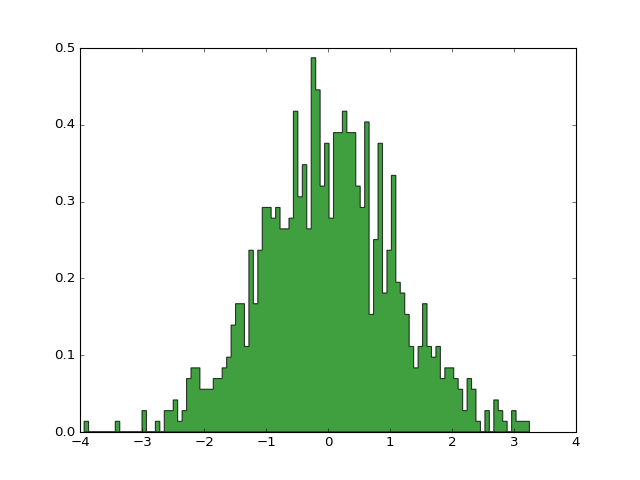

[None, None]

In [8]:

n_size=1000
arr_numpy=np.random.normal(loc=mu,scale=sigma,size=n_size)
bin_size=100

# Plotting histogram
plt.figure()
n, bins, patches = plt.hist(arr_numpy, bins=bin_size, normed=1, histtype='stepfilled')
plt.setp(patches, 'facecolor', 'g', 'alpha', 0.75)


<a id = 'comparison'></a>

## All plots:



<IPython.core.display.Javascript object>


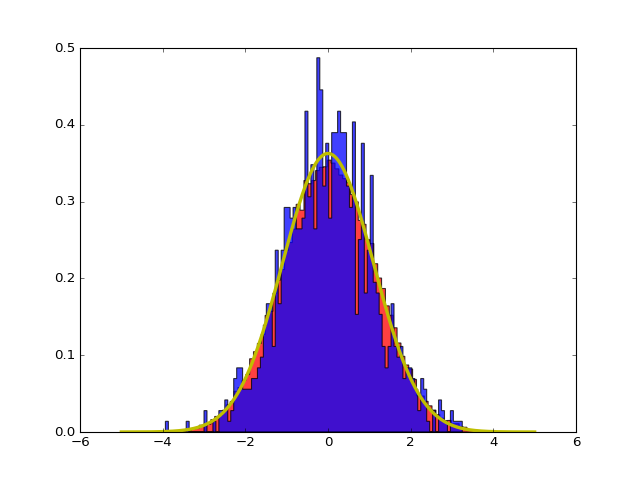

[None, None]

In [9]:
plt.figure()
plt.plot(xarr,yarr,color='y',linewidth='3')


n, bins, patches = plt.hist(arr_metropolis, bins=bin_size, normed=1, histtype='stepfilled')
plt.setp(patches, 'facecolor', 'r', 'alpha', 0.75)


n, bins, patches = plt.hist(arr_numpy, bins=bin_size, normed=1, histtype='stepfilled')
plt.setp(patches, 'facecolor', 'b', 'alpha', 0.75)

## Statistics check

In [10]:
import scipy.stats

print scipy.stats.describe(arr_metropolis)

print scipy.stats.describe(arr_numpy)


DescribeResult(nobs=100000, minmax=(-4.8063865114577577, 4.5813807794717318), mean=0.031317794600488807, variance=1.263281047789427, skewness=0.006795907060187851, kurtosis=-0.09478524645832653)
DescribeResult(nobs=1000, minmax=(-3.9334722211844046, 3.2489522553080787), mean=0.0060286149932206956, variance=1.1641283970757097, skewness=0.03378756480986957, kurtosis=0.09913086042376795)
